Nama : Zakaria Rafi

Judul: Proyek NLP menggunakan Tensorflow

In [3]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv('emotion-labels-train.csv')
val_df = pd.read_csv('emotion-labels-val.csv')
test_df = pd.read_csv('emotion-labels-test.csv')

In [5]:
# Menggabungkan dan mengacak data untuk memenuhi minimal 20% validation set
all_data = pd.concat([train_df, val_df, test_df]).sample(frac=1).reset_index(drop=True)

In [15]:
# Menghitung jumlah sampel validasi yang diperlukan untuk membuatnya 20% dari total dataset
total_samples = len(all_data)
val_samples_required = int(0.2 * total_samples)
print (f"Total sampel validasi yang dibutuhkan untuk memenuhi minimal 'Validation set sebesar 20% dari total dataset' adalah {val_samples_required}")

Total sampel validasi yang dibutuhkan untuk memenuhi minimal 'Validation set sebesar 20% dari total dataset' adalah 1420


In [16]:
# Memisahkan data menjadi data latih dan data validasi
train_size = int(0.8 * len(all_data))
train_data = all_data[:train_size]
val_data = all_data[train_size:]

In [17]:
# Mencetak jumlah total, latih, dan validasi dari dataset
print(f"Jumlah total sampel: {total_samples}")
print(f"Jumlah sampel latihan: {len(train_data)}")
print(f"Jumlah sampel validasi: {len(val_data)}")

Jumlah total sampel: 7102
Jumlah sampel latihan: 5681
Jumlah sampel validasi: 1421


In [19]:
# Mengonfirmasi persentase set validasi
validation_percentage = (len(val_data) / total_samples) * 100
print(f"Set validasi adalah {validation_percentage:.2f}% dari total dataset.")

Set validasi adalah 20.01% dari total dataset.


In [20]:
# Menginisialisasi tokenizer dan menggunakannya pada data latih
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

In [21]:
# Mengubah teks menjadi urutan
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
val_sequences = tokenizer.texts_to_sequences(val_data['text'])

In [22]:
# Padding urutan agar memiliki panjang yang sama
max_sequence_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in val_sequences))
train_padded = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post')
val_padded = pad_sequences(val_sequences, maxlen=max_sequence_length, padding='post')

In [23]:
# Mengubah label menjadi integers
labels_index = {label: index for index, label in enumerate(set(train_data['label']))}
train_labels = train_data['label'].map(labels_index)
val_labels = val_data['label'].map(labels_index)

In [24]:
# Membangun model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_sequence_length),
    LSTM(128),
    Dense(len(labels_index), activation='softmax')
])

In [25]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Mengimplementasikan callback
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [27]:
# Melatih model
history = model.fit(train_padded, train_labels, epochs=50,
                    validation_data=(val_padded, val_labels), callbacks=[early_stop])

Epoch 1/50
178/178 [==============================] - 19s 95ms/step - loss: 1.3276 - accuracy: 0.3401 - val_loss: 1.1378 - val_accuracy: 0.4469
Epoch 2/50
178/178 [==============================] - 16s 89ms/step - loss: 0.9354 - accuracy: 0.5254 - val_loss: 1.0042 - val_accuracy: 0.4708
Epoch 3/50
178/178 [==============================] - 17s 95ms/step - loss: 0.7359 - accuracy: 0.6516 - val_loss: 1.0430 - val_accuracy: 0.5827
Epoch 4/50
178/178 [==============================] - 16s 91ms/step - loss: 0.4100 - accuracy: 0.8558 - val_loss: 0.6378 - val_accuracy: 0.8262
Epoch 5/50
178/178 [==============================] - 16s 93ms/step - loss: 0.2084 - accuracy: 0.9437 - val_loss: 0.5187 - val_accuracy: 0.8543
Epoch 6/50
178/178 [==============================] - 17s 96ms/step - loss: 0.1393 - accuracy: 0.9655 - val_loss: 0.5866 - val_accuracy: 0.8501
Epoch 7/50
178/178 [==============================] - 16s 92ms/step - loss: 0.1198 - accuracy: 0.9695 - val_loss: 0.5968 - val_accuracy:

In [30]:
# Display the validation set as 20% of the total dataset
validation_percentage = (val_samples / total_samples) * 100
print(f"Data validasi adalah {validation_percentage:.2f}% dari total dataset.")

Data validasi adalah 20.01% dari total dataset.


In [31]:
# Evaluasi model pada data latih
train_loss, train_accuracy = model.evaluate(train_padded, train_labels, verbose=0)

# Evaluasi model pada dataset
val_loss, val_accuracy = model.evaluate(val_padded, val_labels, verbose=0)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

# Check if the accuracies meet the 80% criterion
if train_accuracy >= 0.8 and val_accuracy >= 0.8:
    print("Model telah mencapai akurasi minimal 80% pada data latih dan validasi!")
else:
    print("Model belum mencapai akurasi minimal 80% pada data latih dan validasi.")

Training Accuracy: 97.68%
Validation Accuracy: 86.56%
Model telah mencapai akurasi minimal 80% pada data latih dan validasi!


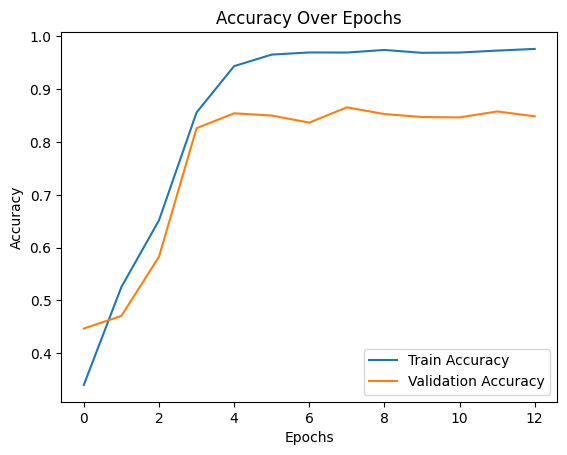

In [32]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

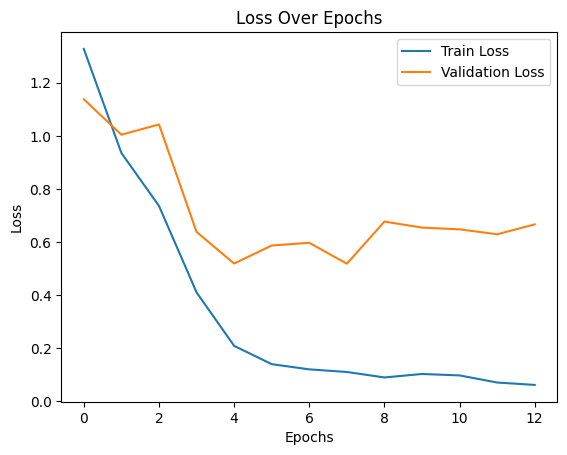

In [33]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
